In [8]:
%%html
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>

In [16]:
# Imports
import ipywidgets as widgets
from IPython.display import Javascript, display, Markdown
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

## Background
---

<div style="text-align: justify">Background about the project</div>

## Pipeline
---

In [3]:
# NBVAL_IGNORE_OUTPUT
cust = ['OMG', 'IPG', 'Katz']
customer_dropdown = widgets.Dropdown(
    options=cust,
    # rows=10,
    description='Select a customer :',
    style={'description_width': 'initial'},
    disabled=False
)
customer_dropdown

Dropdown(description='Select a customer :', options=('OMG', 'IPG', 'Katz'), style=DescriptionStyle(description…

In [4]:
# merge csv download

In [5]:
# NBVAL_IGNORE_OUTPUT
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
    
button = widgets.Button(
    description='Run model',
    disabled=False,
    button_style='primary'
)
button.on_click(run_all)
display(button)

Button(button_style='primary', description='Run model', style=ButtonStyle())

In [6]:
images = os.listdir("/home/jupyter/notebooks/demo_images/")
def printer(image):
    im = cv2.imread("/home/jupyter/notebooks/demo_images/"+ image, 0)
    plt.figure(figsize=(30,30))
    plt.imshow(im, cmap="gray")
    plt.xticks([])
    plt.yticks([])
# This should be executed in an IPython notebook!
widgets.interact(printer, image = images);


interactive(children=(Dropdown(description='image', options=('07.07.20-lb83143-1-2-addl-doc-01.jpg', '07.22.20…

In [10]:

# images = os.listdir("/home/jupyter/data/demo_date_wise/" + change.new)
# images = [image for image in images if image.endswith(".jpg")]
# print(date_folders)

### Date dropdown menu with number of images
---

In [11]:
date_dict = dict()
data_dir = '/home/jupyter/data/demo_date_wise/'
date_folders = os.listdir(data_dir)
for folder_name in date_folders:
    list_of_images = os.listdir(os.path.join(data_dir,folder_name))
    key_dict = folder_name + ' | ' + ' Number of remittance advices--->' +str(len(list_of_images)) 
    date_dict[key_dict] = folder_name

In [12]:
date_dropdown = widgets.Dropdown(
    options=date_dict,
    description='Date Selector:',
    disabled=False,
    layout=widgets.Layout(align_items='center',width='400px'),
    style={'description_width':'initial'}
)
display(date_dropdown)

Dropdown(description='Date Selector:', layout=Layout(align_items='center', width='400px'), options={'07.06.20 …

### Merged customer data
---

In [17]:
map_dict = {'22Squared':'Net Less Discount Total', 
            'GroupM':'Total amount',
            'IPG':'Check Total',
            'MMS':'AMOUNT PAID'
           }
output_data_dir = '/home/jupyter/data/demo_output/csv'
customer_folders = os.listdir(output_data_dir)
customer_dict = dict()
temp_df = pd.DataFrame(columns=['Customer name','Total amount'])
for folder in customer_folders:
#     print(folder)
    file_names = os.listdir(os.path.join(output_data_dir,folder))
    temp_df2 = pd.DataFrame(columns=['Customer name','Total amount'])
    for file_name in file_names:
        df = pd.read_csv(os.path.join(output_data_dir,folder,file_name))
#         print(df)
#         display(Markdown('---'))
        value = df[map_dict[folder]].iloc[0]
        temp_df3 = pd.DataFrame.from_dict({'Customer name': [folder],
                                 'Total amount': [value]})
        temp_df2 = pd.concat([temp_df2,temp_df3],axis=0)
    temp_df2 = temp_df2.groupby(['Customer name'])['Total amount'].agg('sum').reset_index()
    temp_df = pd.concat([temp_df,temp_df2],axis=0,ignore_index=True)
display(Markdown('---'))
temp_df   

---

,Customer name,Total amount
0,22Squared,12732.18
1,GroupM,2758.25
2,IPG,5123.84
3,MMS,15036.50


### Queue into Human support pipeline
---

In [18]:
upload_button = widgets.Button(description="Upload", disabled=True, tooltip='A .csv export from ELNs, LIMS containing reaction SMILES can be uploaded',icon='fa-upload')
display(upload_button)

Button(description='Upload', disabled=True, icon='upload', style=ButtonStyle(), tooltip='A .csv export from EL…

In [19]:
def run_model(ev):
    global model_button_state
    model_button_state = True
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
 
model_widget = widgets.Button(
    description='Run model',
    disabled=False,
    button_style='primary',
    tooltip='Submit',
    icon='fa-cogs'
)
model_widget.on_click(run_model)
display(model_widget)

Button(button_style='primary', description='Run model', icon='cogs', style=ButtonStyle(), tooltip='Submit')

In [20]:
date_picker = widgets.DatePicker(value=pd.to_datetime('2018-01-01'))
display(date_picker)

DatePicker(value=Timestamp('2018-01-01 00:00:00'))

In [21]:
import panel as pn

pn.extension()

In [22]:
date_folders

['07.06.20', '14.08.20', '09.01.20', '18.08.20', '22.07.20', '07.07.20']

In [23]:
from datetime import datetime, date
updated_dates = list()
dt = datetime.strptime('07.06.20','%d.%m.%y')
for dt in date_folders:
    dt_obj = datetime.strptime(dt,'%d.%m.%y')
    updated_dates.append(dt_obj.strftime("%Y-%m-%d"))
updated_dates

['2020-06-07',
 '2020-08-14',
 '2020-01-09',
 '2020-08-18',
 '2020-07-22',
 '2020-07-07']

In [24]:

date_picker = pn.widgets.DatePicker(name='Select Date', enabled_dates = updated_dates, 
                                    value=date.fromisoformat(updated_dates[0]))

display(date_picker)

DatePicker(enabled_dates=['2020-06-07', ...], name='Select Date', value=datetime.date(2020, 6, 7))

In [119]:
date_picker.value

datetime.date(2020, 7, 7)

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

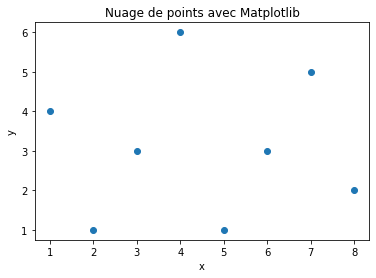

In [5]:
import matplotlib.pyplot as plt

plt.scatter([1,2,3,4,5,6,7,8],[4,1,3,6,1,3,5,2])

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()